### 농구 선수의 게임 데이터를 확용한 포지션 예측을 위한 데이터 정제 
NBA 농구 선수들의 게임 기록을 데이터로 사용해서 특정 농구 선수의 포지션을 예측

In [21]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('../Data/basketball.csv')
df.head()
df.tail()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
95,Nikola Vucevic,C,0.3,6.1,10.4,2.8,1.0,1.0
96,Dwyane Wade,SG,0.8,6.2,4.5,3.8,1.4,0.7
97,Dion Waiters,SG,1.8,4.3,3.3,4.3,0.9,0.4
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1
99,Lou Williams,SG,2.0,3.3,2.5,3.0,1.0,0.2


In [23]:
df.columns

Index(['Player', 'Pos', '3P', '2P', 'TRB', 'AST', 'STL', 'BLK'], dtype='object')

In [24]:
df['Pos'].unique()
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

- Pos: position
- 3P: 한 경기당 평균 3점슛 성공 횟수
- 2P: 한 경기당 평균 2점슛 성공 횟수
- TRB: 한 경기당 평균 리바운드 성공 횟수
- AST: assist
- STL: steal
- BLK: block

### 포지션 별 내용
- C: 포스트 근처에서 슛을 블로킹하고, 리바운드하며, 바깥으로 쳐내며, 골대 근처에서 2점슛으로 득점을 내기도 한다.
- SG: 코트 내에서 3점슛 등 장거리에서 슛을 해서 점수를 얻는 역할.

In [25]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

### 스틸, 2점슛 시각화

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df.sort_values(by='STL',ascending=False)
df.sort_values(by='2P',ascending=False)

,Player,Pos,3P,2P,TRB,AST,STL,BLK
23,Anthony Davis,C,0.5,9.7,11.8,2.1,1.3,2.2
91,Karl-Anthony Towns,C,1.2,8.5,12.3,2.7,0.7,1.3
18,DeMarcus Cousins,C,1.8,7.2,11.0,4.6,1.4,1.3
98,Hassan Whiteside,C,0.0,7.0,14.1,0.7,0.7,2.1
65,C.J. McCollum,SG,2.3,6.3,3.6,3.6,0.9,0.5
...,...,...,...,...,...,...,...,...
22,Troy Daniels,SG,2.1,0.7,1.5,0.7,0.3,0.1
82,J.R. Smith,SG,2.3,0.7,2.8,1.5,1.0,0.3
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
94,Denzel Valentine,SG,1.3,0.5,2.6,1.1,0.5,0.1


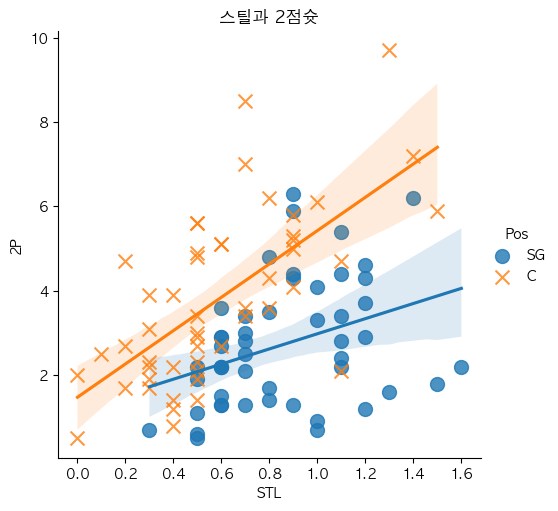

In [28]:
sns.lmplot(
    x='STL',
    y='2P',
    data=df,
    fit_reg=True,
    scatter_kws = {'s':100}, # 좌표상의 점의 크기
    markers = ['o','x'],
    hue = 'Pos', # 대상값
)
plt.title('스틸과 2점슛')
plt.show()

### 어시스트, 2점슛

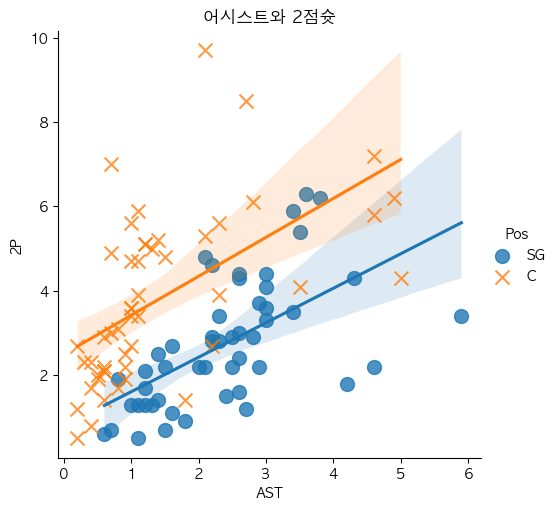

In [29]:
sns.lmplot(
    x='AST',
    y='2P',
    data=df,
    fit_reg=True,
    scatter_kws = {'s':100}, # 좌표상의 점의 크기
    markers = ['o','x'],
    hue = 'Pos', # 대상값
)
plt.title('어시스트와 2점슛')
plt.show()

### 블로킹, 3점슛

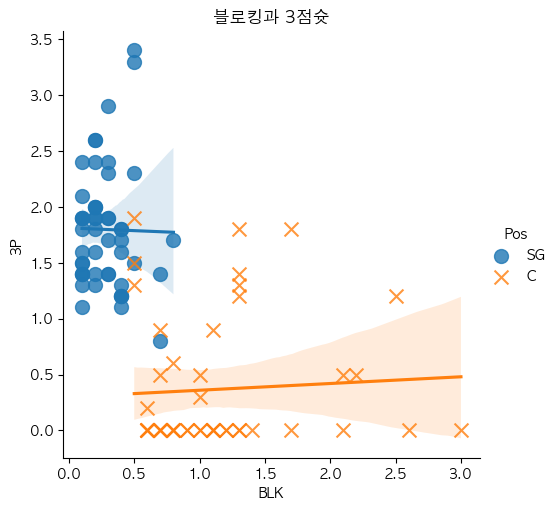

In [30]:
sns.lmplot(
    x='BLK',
    y='3P',
    data=df,
    fit_reg=True,
    scatter_kws = {'s':100}, # 좌표상의 점의 크기
    markers = ['o','x'],
    hue = 'Pos', # 대상값
)
plt.title('블로킹과 3점슛')
plt.show()

### 리바운드, 3점슛

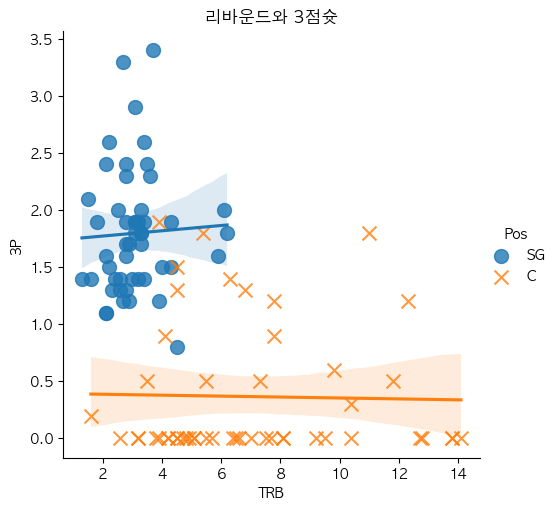

In [38]:
sns.lmplot(
    x='TRB',
    y='3P',
    data=df,
    fit_reg=True,
    scatter_kws = {'s':100}, # 좌표상의 점의 크기
    markers = ['o','x'],
    hue = 'Pos', # 대상값
)
plt.title('리바운드와 3점슛')
plt.show()

### 데이터 다루기
- 분별력 없는 Feature를 데이터에서 제거
- 시각화를 통해 확인해 본 결과 2P, AST, STL은 분별력이 없다.

In [32]:
df.drop(['2P','AST','STL'],axis=1,inplace=True)

In [33]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


### 학습 데이터와 검증 데이터로 나누기

In [34]:
from sklearn.model_selection import train_test_split

# 다듬어진 데이터에서 20%를 테스트 데이터로 분류합니다.
train, test = train_test_split(df, test_size=0.2)

In [35]:
train.shape

(80, 5)

In [36]:
test.shape

(20, 5)

In [37]:
# 데이터 저장
train.to_csv('../Data/basketball_train.csv',index=False)
test.to_csv('../Data/basketball_test.csv',index=False)